# Rain in Australia

Problèmatique : Le but de mon modèle est de prévoir le temps en Australie (pluie ou non). Ce modèle pourrait être utiliser dans les prévisions météorologiques

## Importation des bibliothèques

In [2]:
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
import seaborn as sea
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


## Chargement du dataset

In [3]:
df = pds.read_csv("https://raw.githubusercontent.com/kevintsi/pythonIOT/master/ML/Data/weatherAUS.csv")

## Montre les informations du dataset

In [4]:
# Dimensions 
df.shape

(142193, 24)

In [5]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0,No
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0,No
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0,No
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0,No
142192,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,0.0,No


In [7]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RISK_MM          float64
RainTomorrow      object
dtype: object

## Description des colonnes

- <b>Date</b> : Date de l'observation<br>
- <b>Location</b> : Nom commun de l'emplacement de la station météorologique<br>
- <b>MinTemp</b> : La température minimum en degré celcius<br>
- <b>MaxTemp</b> : Température maximal en degré celcius<br>
- <b>Rainfall</b> : La hauteur de précipitation enregistré pour la journée en mm<br>
- <b>Evaporation</b> : L'évaporation dite de classe A (mm) dans les 24 heures à 9 heures<br>
- <b>Sunshine</b> : Le nombre d'heures de lumière du soleil dans la journée<br>
- <b>WindGustDir</b> : La direction de la rafale de vent la plus forte dans les 24 heures à minuit<br>
- <b>WindGustSpeed</b> : La vitesse de la rafale de vent la plus forte dans les 24 heures à minuit<br>
- <b>WindDir9am</b> : Direction du vent à 9 heures<br>
- <b>WindDir3pm</b> : Direction du vent à 15 heures<br>
- <b>WindSpeed9am</b> : Vitesse du vent en km/hr moyenné sur 10 minutes avant 9 heure<br>
- <b>WindSpeed3pm</b> : Vitesse du vent en km/hr moyenné sur 10 minutes avant  15 heures
 



- <b>Humidity3pm</b> : Pourcentage d'humidité à 15 heures<br>
- <b>Pressure9am</b> : Pression atmosphérique (hpa) réduit au niveau de l'océan moyen à 15 heures<br>
- <b>Cloud9am</b> : Fraction du ciel obscurcit par le nuage à 9 heures. C'est mesuré en "oktas",  qui est une unité de 8. <br>
- <b>Temp9am</b> : Temperature (degrees C) à 9 heures<br>
- <b>Temp3pm</b> : Temperature (degrees C) à 15 heures<br>
- <b>RainToday</b> : Booléen : 1 si la précipitation dans les 24 heures à 9 heures excèdent 1 mm sinon 0<br>
- <b>RISK_MM</b> : Quantité de pluie du jour d'après en mm. Utilisé pour créer une variable réponse RainTomorrow. Un genre de mesure de "risque"<br>
- <b>RainTomorrow</b> : La variable cible. A-t-il plus le lendemain?



In [8]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


## PARTIE 1 : Analyse graphique des données

In [9]:
df.Location.value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
PerthAirport        3009
MelbourneAirport    3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
NorfolkIsland       2964
Penrith             2964
Newcastle           2955
SalmonGums          2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


J'ai mis un commentaire un peu long et ça m'a donné cette erreur

### Description des variables

<b>Date</b> : Date de l'observation<br>
<b>Location</b>  : Le nom commun de l'emplacement de la station météorologique<br>
<b>MinTemp</b> : La température minimal en degré celcius<br>
<b>MaxTemp</b> : La température maximal en degré celcius<br>
<b>Rainfall</b> : La hauteur de précipitation enregistré pour le jour en mm<br>
<b>Evaporation</b> : L'évaporation dite de classe A (mm) dans les 24 heures à 9 heures <br>
<b>Sunshine</b> : Le nombre d'heures de lumiere de soleil dans la journée<br>
<b>WindGustSpeed</b> : La vitesse (km/h) de la rafale de vent le plus fort dans les 24 heure à minuit<br>
<b>WindDir9am</b> : Direction du vent à 9 heures<br>
<b>WindSpeed3pm</b> : Vitesse du vent (km/hr) moyenné sous les 10 minutes avant 15 heure<br>
<b>Humidity9am</b> : Humidité (pourcentage) à 9 heure<br>
<b>Pressure9am</b> : Atmosphérique pressure (hpa) réduit à la moyenne au niveau de l'océan à 9 heure<br>
<b>Pressure3pm</b> : Pression atmosphérique (hpa) réduit à la moyenne au niveau de l'océan à 15 heure<br>
<b>Cloud9am</b> : Fraction du ciel obscurcit par les nuages à 9 heure. Mésuré en "oktas", qui sont aux unités de 8.<br>
<b>Cloud3pm</b> : Fraction du ciel obscurcit à 15 heure.<br>
<b>Temp9am</b> : Temperature (degrees C) à 9 heure</br>
<b>Temp3pm</b> : Température (degrees C) à 15 heure</br>
<b>RainToday</b> : Un booléen, 1 si la précipitation dans les 24 heures à 9 heure excède 1 mm sinon 0</br>
<b>RISK_MM</b> : La quantité de pluie du lendemain en mm. Utilisé pour créer la variable de réponse RainTomorrow. Un type de mesure de "risk"</br>
<b>RainTomorrow</b> : La variable cible. A-t-il plu ? 





In [10]:
df = df.dropna()

import matplotlib.pyplot as plt

location_proportion=df.Location.value_counts()/df.Location.value_counts().sum()

fig =plt.figure(figsize=(17,5))
ax1 = fig.add_subplot(1,2,1)
ax1.pie(x=location_proportion, explode=(0,0.1), labels=df.Location, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title("Proportion d'observations ayant des antécédents familiaux")

plt.show()

Conversion de la colonne Date (string) en datetime

In [21]:
df.Date = pds.to_datetime(df.Date)
df.Date

5939     2009-01-01
5940     2009-01-02
5942     2009-01-04
5943     2009-01-05
5944     2009-01-06
            ...    
139108   2017-06-20
139109   2017-06-21
139110   2017-06-22
139111   2017-06-23
139112   2017-06-24
Name: Date, Length: 56420, dtype: datetime64[ns]

Conversion de la colonne Location en valeur numerique

In [12]:
label_encoder = LabelEncoder()
df.Location = label_encoder.fit_transform(df.Location)
df.Location

5939      4
5940      4
5942      4
5943      4
5944      4
         ..
139108    6
139109    6
139110    6
139111    6
139112    6
Name: Location, Length: 56420, dtype: int32

Conversion de la colonne RainTomorrow en valeur numérique

In [13]:
label_encoder = LabelEncoder()
df.RainTomorrow = label_encoder.fit_transform(df.RainTomorrow)
df.RainTomorrow

5939      0
5940      0
5942      0
5943      0
5944      0
         ..
139108    0
139109    0
139110    0
139111    0
139112    0
Name: RainTomorrow, Length: 56420, dtype: int32

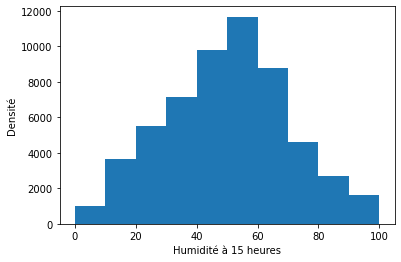

In [22]:
plt.hist(df.Humidity3pm)
plt.xlabel("Humidité à 15 heures")
plt.ylabel("Densité")
plt.show()

In [15]:
std = np.std(df.Humidity3pm, ddof=1)
mean = np.mean(df.Humidity3pm)

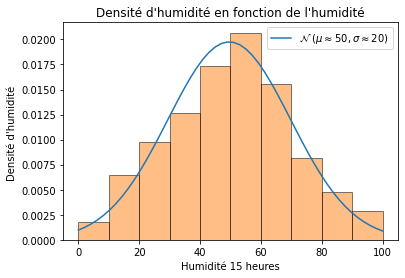

In [23]:
domain = np.linspace(np.min(df.Humidity3pm), np.max(df.Humidity3pm))
plt.plot(domain, norm.pdf(domain, mean, std),
label='$\mathcal{N}$ '+f'$(\mu \\approx {round(mean)}, \sigma \\approx {round(std)} )$')
plt.hist(df.Humidity3pm, edgecolor='black', alpha=.5, density=True)
plt.title("Densité d'humidité en fonction de l'humidité")
plt.xlabel("Humidité 15 heures")
plt.ylabel("Densité d'humidité ")
plt.legend()
plt.show()

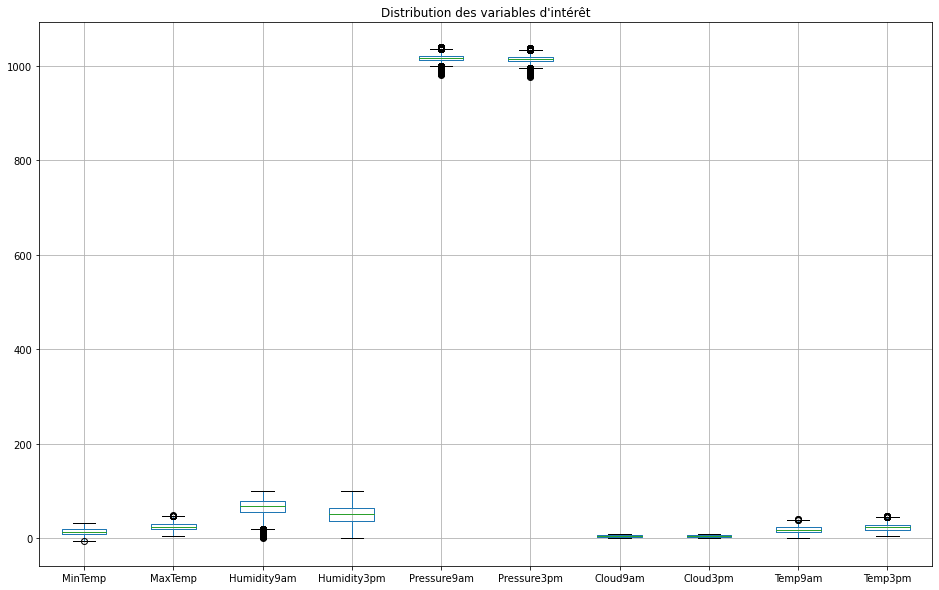

In [39]:
plt.figure(figsize=(16,10))
df[["MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]].boxplot()
plt.title("Distribution des variables d'intérêt")
plt.show()

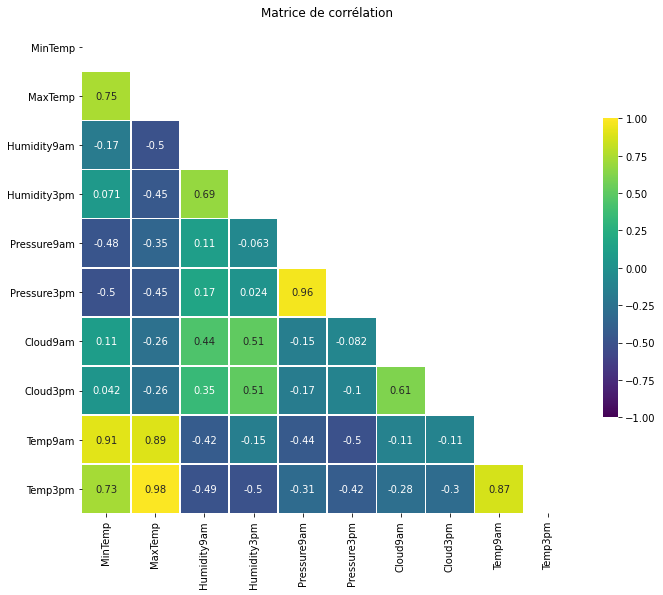

In [35]:
data_corr=pds.DataFrame(df,columns=["MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"])

corr=data_corr.corr()
corr_map=sea.color_palette("viridis",as_cmap=True)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 11))
sea.heatmap(corr, annot=True,vmin=-1, vmax=1, center=0, cmap='viridis', square=True, linewidths=.5,mask=mask, cbar_kws={"shrink": .5})
plt.title("Matrice de corrélation")
plt.show()

Corrélation entre :
- Température minimale et température à 15 heures
- Température maximale et Température à 15 heures
- Température à 9 heures et Température à 15 heures
- Préssion à 9 heures et Préssion à 15 heures
- Température minimale et Température maximale

## PARTIE 2 : Model Building

In [42]:
X = df[["MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "Location"]]
y = df["RainTomorrow"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=42)

modelrank = LinearRegression()
modelrank.fit(X_train, y_train)



LinearRegression()

In [43]:
modelrank.score(X_test,y_test)*100

30.013630636451992